# Бинарные переменные: категориальные переменные
(небинарные качественные признаки)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col # вывод подгонки
from scipy.stats import f # F-распределение
import seaborn as sns

In [2]:
diamond_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Diamond.csv')
diamond_df.head()

,carat,colour,clarity,certification,price
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641


Описательные статистики по категрриальным переменным

In [3]:
diamond_df.value_counts(subset='colour')

colour
F    82
G    65
H    61
E    44
I    40
D    16
dtype: int64

In [4]:
diamond_df.value_counts(subset='certification')

certification
GIA    151
HRD     79
IGI     78
dtype: int64

## Price equation
Для датасета `Diamond` рассмотрим регрессию **log(price) на carat, carat^2, colour, certification**.

Результаты подгонки

In [5]:
mod = smf.ols(formula='np.log(price)~carat+I(carat**2)+C(colour)+C(certification)', data=diamond_df).fit()
mod.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
No. Observations:                 308   F-statistic:                     2032.
Covariance Type:            nonrobust   Prob (F-statistic):          1.23e-261
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.8660      0.049    119.906      0.000       5.770       5.962
C(colour)[T.E]             -0.0763      0.031     -2.489      0.013      -0.137      -0.016
C(colour)[T.F]             -0.1524      0.029     -5.294      0.000      -0.209      -0.096
C(colour)[T.G]             -0.2272      0.029     -7.720      0.000      -0.285      -0.169
C(colour)[T.H]             -0.3135      0.030    -10.572      0.000      -0.372      -0.255
C(colour)[T.I]             -0.4082      0.031    -13.134      0.000      -0.469      -0.347
C(certification)[T.HRD]     0.0425      0.015      2.798      0.005       0.013       0.072
C(certification)[T.IGI]     0.0855      0.019      4.617      0.000       0.049       0.122
carat                       5.6675      0.135     41.895      0.000       5.401       5.934
I(carat ** 2)              -2.1534      0.099    -21.672      0.000      -2.349      -1.958
===========================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Значимость влияния `colour`

In [6]:
mod.f_test('C(colour)[T.E]=C(colour)[T.F]=C(colour)[T.G]=C(colour)[T.H]=C(colour)[T.I]=0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=71.5468652342428, p=5.2024652601238796e-49, df_denom=298, df_num=5>

## Некоторые графики

<Axes: xlabel='colour', ylabel='count'>

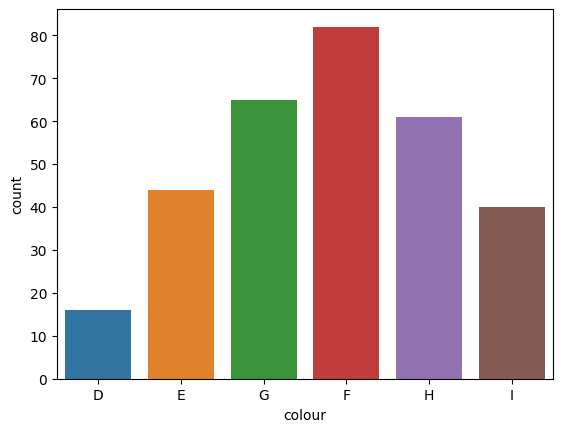

In [7]:
sns.countplot(data=diamond_df, x='colour')

<Axes: xlabel='certification', ylabel='count'>

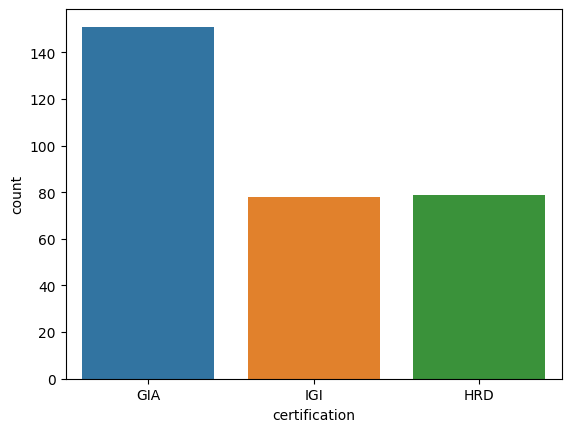

In [8]:
sns.countplot(data=diamond_df, x='certification')

<Axes: xlabel='carat', ylabel='price'>

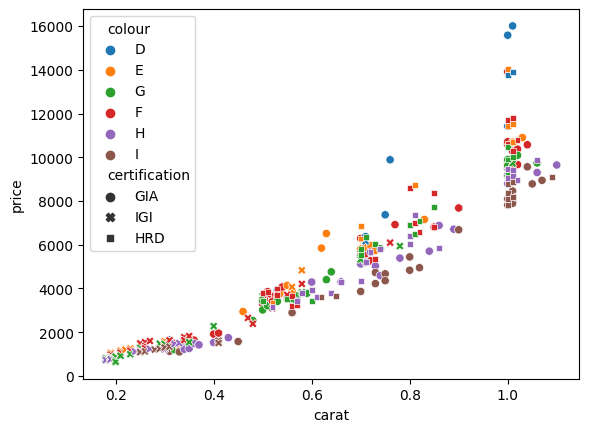

In [9]:
sns.scatterplot(data=diamond_df, x='carat', y='price', style='certification', hue='colour')

<Axes: xlabel='carat', ylabel='price'>

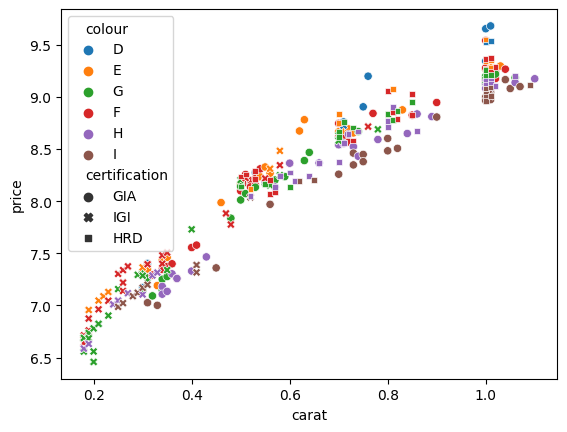

In [10]:
sns.scatterplot(x=diamond_df['carat'], y=np.log(diamond_df['price']), style=diamond_df['certification'],
               hue=diamond_df['colour'])